# Multivariate Data

In this notebook we are going to look at some simple multivariate data.

## What is Multivariate Data?

As the name implies, multivariate data is data that consists of more than two variables. The idea is the same is it is with bivariate data, except we have more variables to work with.

### Examples

Again let's consider data from the *U.S. Standard Atmostphere 1976*. We 
The original data and model can be found in its original form, provided by NASA [here](https://ntrs.nasa.gov/api/citations/19770009539/downloads/19770009539.pdf). We however are using a stripped down version sourced from [here](https://www.engineeringtoolbox.com/standard-atmosphere-d_604.html).

In [9]:
import pandas as pd

atmos = pd.read_csv("_resources/atmosphere.csv")
atmos

,altitude,temperature,gravity,atmospheric_pressure,air_density,dynamic_viscosity
0,-1000,21.50,9.810,11.390000,1.347000,1.821
1,0,15.00,9.807,10.130000,1.225000,1.789
2,1000,8.50,9.804,8.988000,1.112000,1.758
3,2000,2.00,9.801,7.950000,1.007000,1.726
4,3000,-4.49,9.797,7.012000,0.909300,1.694
5,4000,-10.98,9.794,6.166000,0.819400,1.661
6,5000,-17.47,9.791,5.405000,0.736400,1.628
7,6000,-23.96,9.788,4.722000,0.660100,1.595
8,7000,-30.45,9.785,4.111000,0.590000,1.561
9,8000,-36.94,9.782,3.565000,0.525800,1.527


We can look at any two variables with respect to altitude (generally our independent variable).

<Axes: title={'center': 'Altitude vs. Atmospheric Pressure'}, xlabel='Altitude (m)', ylabel='Atmospheric Pressure ($10^{-5}N s/m^{2}$)'>

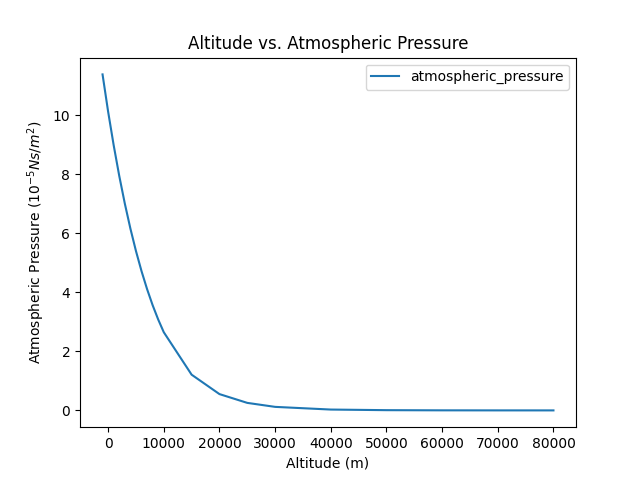

In [10]:
atmos.plot(
    x="altitude",
    y="atmospheric_pressure",
    xlabel="Altitude (m)",
    ylabel="Atmospheric Pressure ($10^{-5}N s/m^{2}$)",
    title="Altitude vs. Atmospheric Pressure",
)

<Axes: title={'center': 'Altitude vs. Temperature'}, xlabel='Altitude (m)', ylabel='Temeprature ($^{\\circ}C$)'>

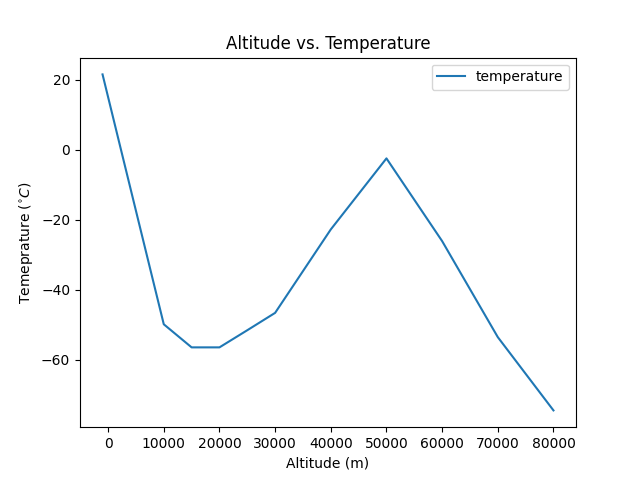

In [12]:
atmos.plot(
    x="altitude",
    y="temperature",
    xlabel="Altitude (m)",
    ylabel=r"Temeprature ($^{\circ}C$)",
    title="Altitude vs. Temperature",
)

Or we can plot them simulataneously on the same figure

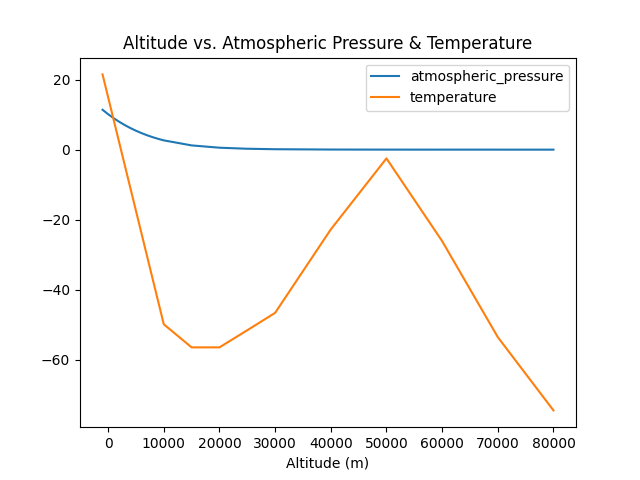

In [13]:
ax = atmos.plot(
    x="altitude",
    y=["atmospheric_pressure", "temperature"],
    xlabel="Altitude (m)",
    title="Altitude vs. Atmospheric Pressure & Temperature",
)

The problem with setting both of these variables on the same plot is that numerically they are within very different ranges of values. Temperature fluctuates from 20 down to nearly -80, and our density only ranges from a little over 10.0 to nearly 0.0 - what would be beneficial is even we could place these variables on separate axes within our figure, so that they do not need to share the same range on our canvas.

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sanch\AppData\Local\Temp\ipykernel_21848\672382312.py:14: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel("Temeprature ($^{\circ}C$)")


Text(0, 0.5, 'Temeprature ($^{\\circ}C$)')

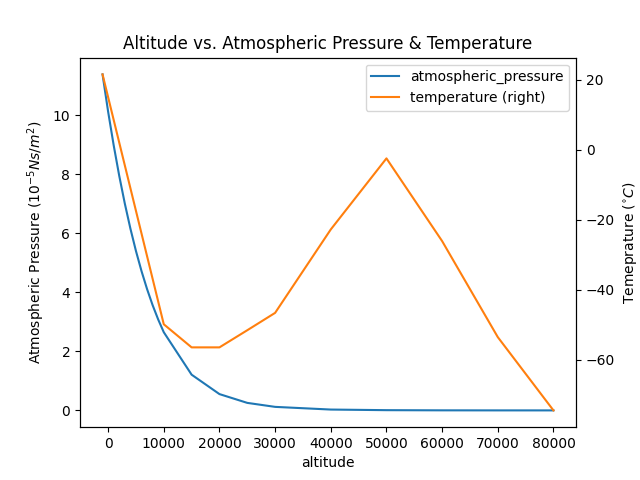

In [14]:
ax = atmos.plot(
    x="altitude",
    y="atmospheric_pressure",
    xlabel="Altitude (m)",
    ylabel="Atmospheric Pressure ($10^{-5}N s/m^{2}$)",
    title="Altitude vs. Atmospheric Pressure & Temperature",
)
ax = atmos.plot(
    x="altitude",
    y="temperature",
    secondary_y=True,
    ax=ax,
)
ax.set_ylabel("Temeprature ($^{\circ}C$)")

Now we can see both data sets in better detail (specifically atmospheric pressure), as temperature is added to a secondary axis. This allows us to avoid visually squashing the pressure data. We can even try to throw the rest of our metrics onto this dual-axis figure.

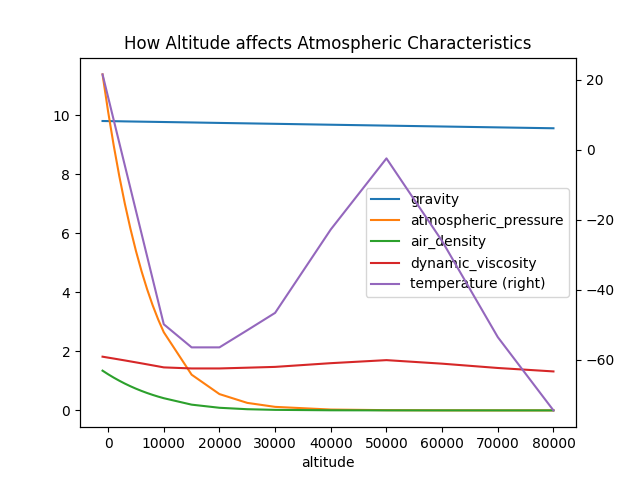

In [15]:
%matplotlib widget
ax = atmos.plot(
    x='altitude',
    y=['gravity', 'atmospheric_pressure', 'air_density', 'dynamic_viscosity'],
    xlabel='Altitude (m)',
    title='How Altitude affects Atmospheric Characteristics',
)
ax = atmos.plot(
    x='altitude',
    y='temperature',
    secondary_y=True,
    ax=ax,
)

Sadly this is not an improvement, as some of our other variables are getting squisshed by the relatively large scale. We cannot add more y-axes (we could add a z-axis, but then we cannot have a secondary-y), and so we are left to make multiple plots and figures, or even rescale some of our variables to fall within similar ranges. Rescaling data like this is ok so long as it is clear what scaling was done (usually by modifying how the units are presented).

The 3d plot gives us a single curve that shows how our data flows in all three dimensions, but it is not entirely useful, and we cannot add secondary axes to any of our dimensions.

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sanch\AppData\Local\Temp\ipykernel_21848\1284961662.py:9: SyntaxWarning: invalid escape sequence '\c'
  ax.set_zlabel('Temeprature ($^{\circ}C$)')


Text(0.5, 0, 'Temeprature ($^{\\circ}C$)')

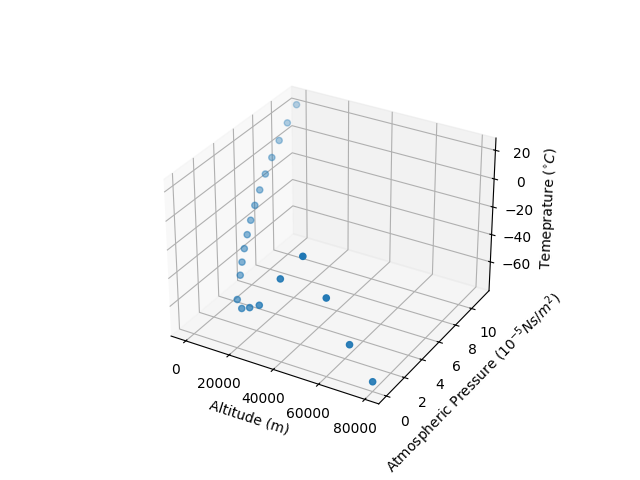

In [16]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(atmos.altitude, atmos.atmospheric_pressure, atmos.temperature)
ax.set_xlabel('Altitude (m)')
ax.set_ylabel('Atmospheric Pressure ($10^{-5}N s/m^{2}$)')
ax.set_zlabel('Temeprature ($^{\circ}C$)')

One solution to encoding multiple variables of our data into our visualzation is to employ some of the basic techniques we learned about last week - using markers and colors to represent other facets of our data, perhaps even keeping it as a 3d plot.

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sanch\AppData\Local\Temp\ipykernel_21848\717406545.py:7: SyntaxWarning: invalid escape sequence '\c'
  ax.set_zlabel('Temeprature ($^{\circ}C$)')


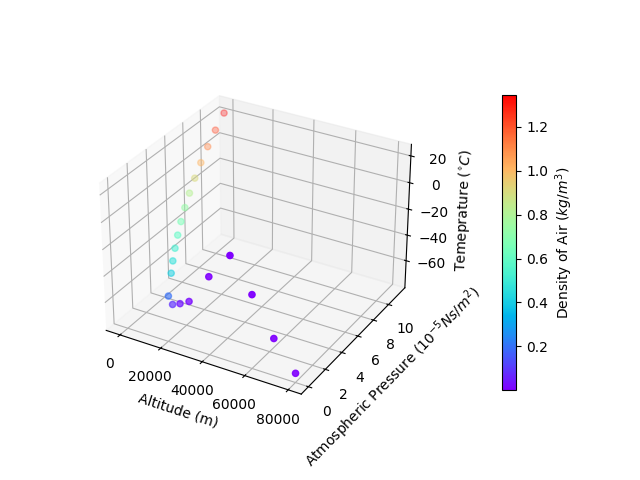

In [17]:
%matplotlib widget
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
p = ax.scatter3D(atmos.altitude, atmos.atmospheric_pressure, atmos.temperature, c=atmos.air_density, cmap='rainbow')

ax.set_xlabel('Altitude (m)')
ax.set_ylabel('Atmospheric Pressure ($10^{-5}N s/m^{2}$)')
ax.set_zlabel('Temeprature ($^{\circ}C$)')

cb = fig.colorbar(p, shrink=0.8, pad=0.15)
cb.set_label('Density of Air ($kg/m^{3}$)')

There are many ways for us to work with and visualize multivariate data, but it is highly dependent on the data. Data that consists of clusters of data can be visualized using methods like parallel coordinate/Andrews Curves; data that consists of categorical data may be representable with a radar plot; and sometimes the data just needs to be manipulated in ways to reduce what an analyst is looking at. We will soon be looking in more detail on how to cluster and group data, especially when working with data that is not directly categorical.